<a href="https://colab.research.google.com/github/Vicrrs/dog_breed_classification/blob/main/classifica_raca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de raças de cachorros

### Baixando e descompactando dados


In [2]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2023-02-17 01:28:38--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.178.165, 52.217.34.22, 52.217.10.222, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.178.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  11.8MB/s    in 1m 56s  

2023-02-17 01:30:35 (11.1 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [ ]:
!tar zxvf imagewoof2.tgz


## Instalação da Biblioteca deepfeatx

In [ ]:
!pip install deepfeatx

## Extrair características a partir das imagens

In [5]:
from deepfeatx.image import ImageFeatureExtractor

In [6]:
fe = ImageFeatureExtractor('efficientnetb4')

71686520/71686520 [==============================] - 4s 0us/step


In [7]:
train = fe.extract_features_from_directory('/content/imagewoof2/train',
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 9025 images belonging to 10 classes.
283/283 [==============================] - 67s 199ms/step


In [8]:
train.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.235262,-0.097540,0.160580,0.271798,0.132469,1.340623,-0.156224,0.014820,...,0.215442,0.158624,-0.201360,-0.204290,0.356231,0.118752,-0.154093,0.298172,-0.179607,-0.194276
1,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.149054,0.001021,-0.156537,-0.204830,0.105294,0.296549,-0.165714,-0.156713,...,0.504865,-0.136174,-0.146207,-0.236528,-0.211885,0.061007,-0.201124,-0.190740,-0.197862,-0.203315
2,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,-0.147828,-0.106601,-0.054298,0.146187,-0.199876,0.610708,-0.145832,-0.126739,...,-0.005589,-0.030053,-0.161283,-0.110392,-0.168649,0.013537,-0.167244,-0.071271,-0.101303,-0.145833
3,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.036386,0.102320,-0.176408,0.841933,-0.208296,0.064328,-0.208992,-0.145640,...,0.068088,-0.181514,-0.159000,-0.171961,0.044891,-0.038166,-0.219997,-0.180216,-0.236641,0.760273
4,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.475484,-0.179249,-0.156005,0.572106,0.241926,0.560687,-0.111141,-0.133351,...,0.250929,-0.056767,-0.180065,-0.197333,0.046616,0.264113,-0.217478,-0.186778,-0.195400,-0.168541


In [9]:
test = fe.extract_features_from_directory('/content/imagewoof2/val',
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 3929 images belonging to 10 classes.
123/123 [==============================] - 21s 170ms/step


In [10]:
test.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.010032,-0.134886,-0.145639,0.219374,-0.187060,0.417243,-0.056433,-0.110010,...,0.057381,-0.049127,-0.164968,-0.228540,-0.178836,0.202133,-0.164508,-0.105748,-0.170468,-0.209100
1,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,-0.067582,-0.098245,0.075923,-0.055532,-0.069492,0.336250,-0.147553,-0.115740,...,0.199923,-0.165566,-0.171385,-0.233517,0.019979,0.137625,-0.166060,-0.120308,-0.193541,-0.079832
2,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.042435,-0.149943,-0.155567,0.851448,-0.023883,0.310433,-0.118888,-0.114958,...,0.628066,-0.166223,-0.154654,-0.214810,-0.149376,-0.001795,-0.192078,-0.163293,-0.161350,-0.222182
3,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.332426,-0.122655,-0.157069,0.216110,0.053469,-0.146146,-0.230143,-0.087101,...,0.350972,-0.101271,-0.175364,-0.205283,0.426783,0.399639,-0.195552,-0.087466,-0.228071,-0.089991
4,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.263282,-0.068650,-0.018985,0.022607,1.174893,0.177848,-0.096873,-0.134003,...,1.236458,0.235701,-0.053071,-0.034010,-0.116724,0.018900,-0.207200,-0.148729,-0.043675,-0.085650


## Treinamento do modelo

In [11]:
from sklearn.linear_model import LogisticRegression


In [12]:
X_train = train.drop(['filepaths', 'classes'], axis=1)
X_test = test.drop(['filepaths', 'classes'], axis=1)

y_train = train['classes']
y_test = test['classes']


lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Métricas

In [13]:
# acurácia
lr.score(X_test, y_test)

0.9592771697632986

In [14]:
from sklearn.metrics import confusion_matrix


In [15]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[396,   0,   0,   0,   5,   0,   2,   5,   1,   0],
       [  0, 396,   0,   1,   3,   2,   4,   0,   0,   2],
       [  2,   3, 392,  18,   2,   0,   0,   0,   0,   1],
       [  2,   4,  22, 191,   1,   0,   1,   0,   0,   3],
       [  4,   1,   1,   0, 388,   5,   0,   1,   1,   0],
       [  3,   1,   0,   3,  10, 386,   0,   2,   0,   2],
       [  2,   2,   0,   1,   1,   2, 391,   0,   1,   1],
       [  5,   1,   0,   0,   0,   0,   1, 414,   1,   0],
       [  0,   0,   0,   0,   0,   0,   2,   2, 424,   1],
       [  1,   7,   1,   2,   3,   1,   4,   0,   0, 391]])

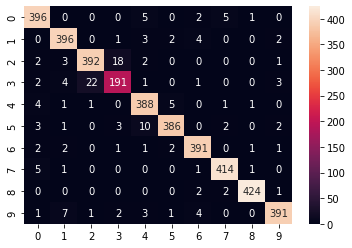

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')